## Iris Flowers Classification ML Project 


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

iris = pd.read_csv(r"C:\Users\Admin\Downloads\IRIS.csv")
iris.shape

(150, 5)

In [42]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [44]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [45]:
#Dataset Summary
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [46]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [48]:
iris["species"].value_counts() # To display no. of samples on each class.


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [49]:
print("Target Labels", iris["species"].unique())

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

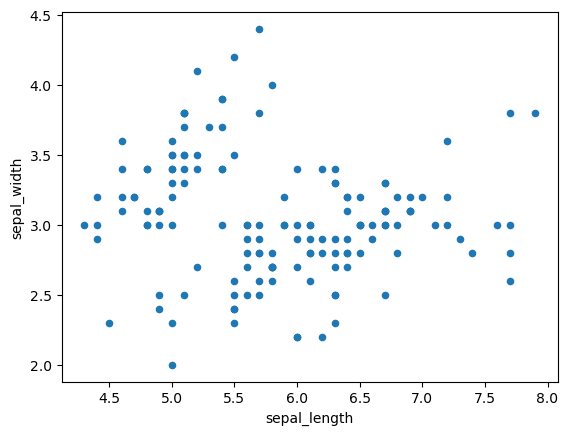

In [50]:
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

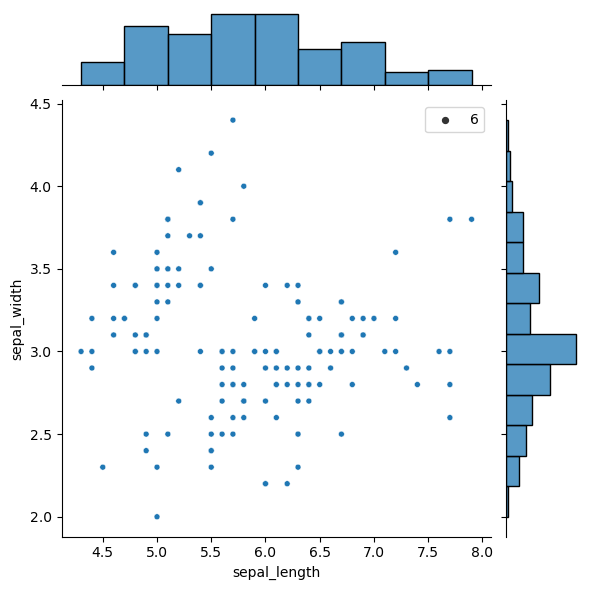

In [51]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
import seaborn as sns
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=6)

<Axes: xlabel='species', ylabel='petal_length'>

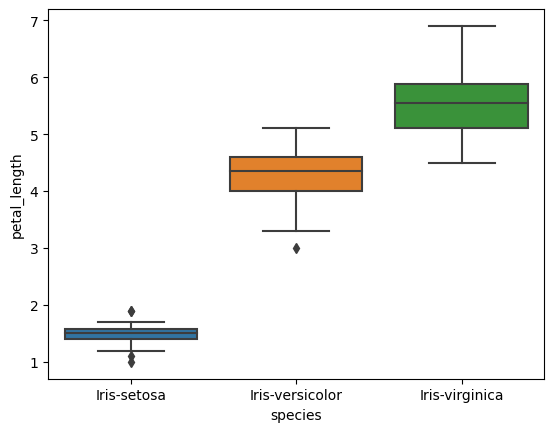

In [52]:
sns.boxplot(x="species", y="petal_length", data=iris)

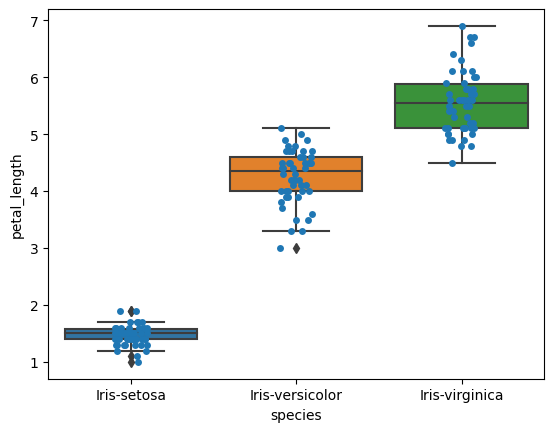

In [53]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

<Axes: xlabel='species', ylabel='petal_length'>

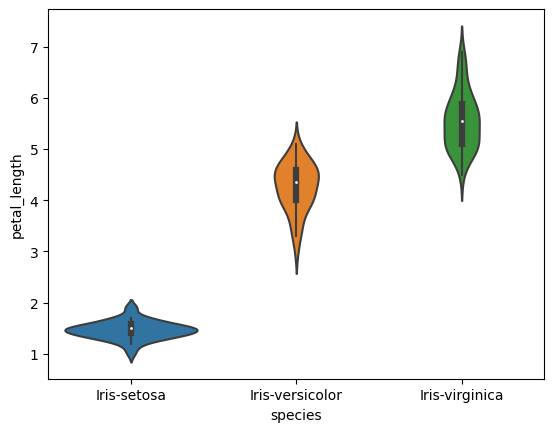

In [26]:
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="species", y="petal_length", data=iris, size=10)

In [54]:
#correlation matrix
iris.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14028\3933421126.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_14028\3364065274.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



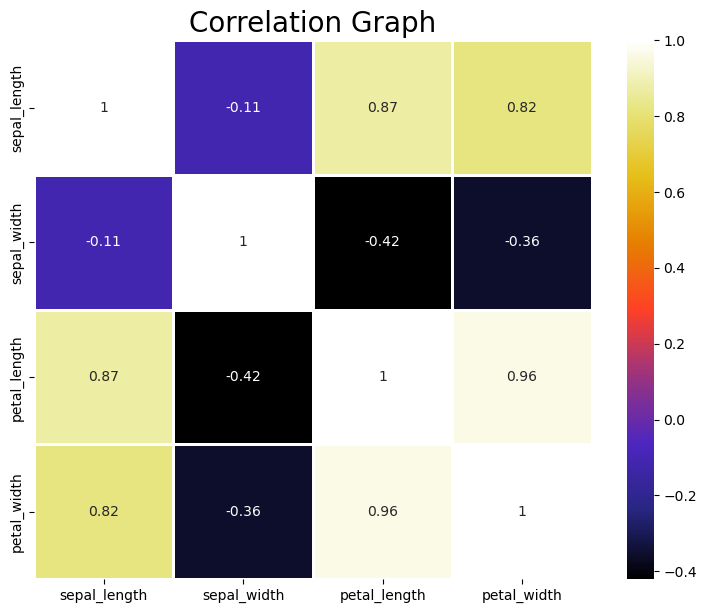

In [55]:


#Correlation Heatmap
plt.figure(figsize=(9,7))
sns.heatmap(iris.corr(),cmap='CMRmap',annot=True,linewidths=2)
plt.title("Correlation Graph",size=20)
plt.show()

In [29]:
pip install plotly==5.15.0

     ---------------------------------------- 15.5/15.5 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0
Note: you may need to restart the kernel to use updated packages.


In [56]:
import plotly.express as px
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [57]:
#Splitting dataset for training and testing
x = iris.drop("species", axis=1)
y = iris["species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

In [58]:
from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [59]:
#Iris Classification Model using KNN classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

prediction = knn.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667
